<a href="https://colab.research.google.com/github/marcusvpimentel/Mestrado/blob/main/KMeans_Load_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Implementação do vídeo

In [ ]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data[:,2:4]
y = dataset.target
dataset.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

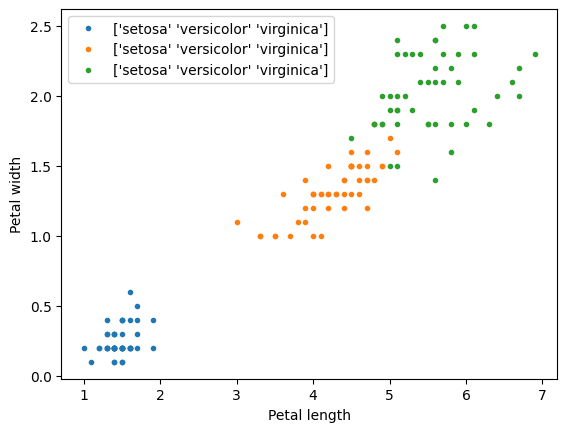

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(set(y))):
  plt.plot(X[y==i,0], X[y==i,1], ".", label=dataset.target_names)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

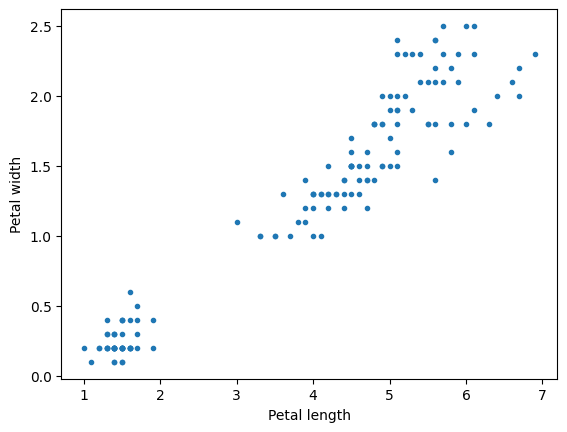

In [ ]:
plt.scatter(X[:,0], X[:,1], marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

[[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]


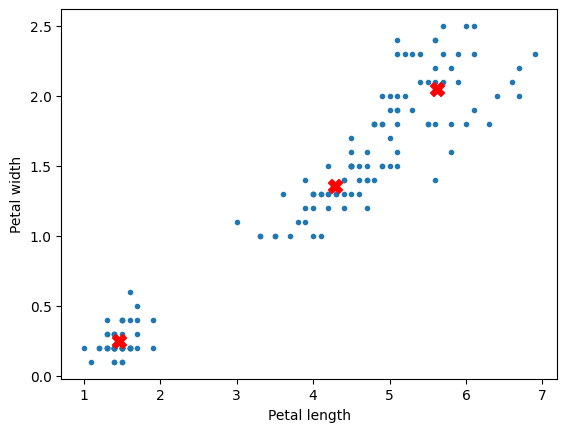

In [ ]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(BaseEstimator, ClusterMixin, TransformerMixin):
  def __init__(self, n_clusters=3):
    self.n_clusters = n_clusters

  def _init_centroids(self, X):
    min = np.min(X, axis=0)
    max = np.max(X, axis=0)
    centroids = []
    for i in range(self.n_clusters):
      centroid = []
      for j in range(X.shape[1]):
        centroid.append(random.uniform(min[j], max[j]))
      centroids.append(centroid)
    self.clusters_centers_ = np.array(centroids)

  def fit(self, X, y=None):
    self._init_centroids(X)
    ypred = self.predict(X)
    previous_centroids = self.clusters_centers_.copy()
    while True:
      ypred = self.predict(X)
      for i in range(self.n_clusters):
        if np.any(ypred==i):
          self.clusters_centers_[i] = np.mean(X[ypred==i], axis=0)
      if np.allclose(previous_centroids, self.clusters_centers_, atol=0.0001):
        break
      previous_centroids = self.clusters_centers_.copy()

  def _distancias(self, X):
    diferenca = self.clusters_centers_ - X
    quadrado = diferenca ** 2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz

  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self._distancias(X[i])
      centroid = np.argmin(distancias)
      ypred[i] = centroid
    return ypred

kmenas = KMeans()
kmenas.fit(X)
print(kmenas.clusters_centers_)

plt.scatter(X[:,0], X[:,1], marker=".")
plt.scatter(kmenas.clusters_centers_[:,0],kmenas.clusters_centers_[:,1],
            marker="X", color="r", s=100, linewidths=3)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

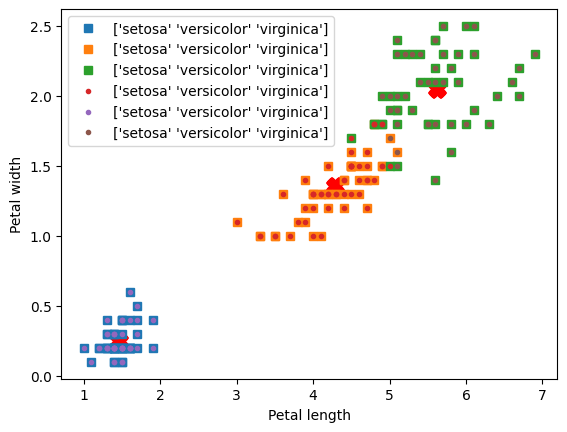

In [ ]:
for i in range(len(set(y))):
  plt.plot(X[y==i,0], X[y==i,1], "s", label=dataset.target_names)
  plt.scatter(kmenas.clusters_centers_[:,0],kmenas.clusters_centers_[:,1],
            marker="X", color="r", s=100, linewidths=3)

ypred = kmenas.predict(X)
for i in range(len(set(ypred))):
  plt.plot(X[ypred==i,0], X[ypred==i,1], ".", label=dataset.target_names)


plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

### Exercício - KMeans do Scikit-learn para agrupar o dataset Iris usando apenas as suas últimas características.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

dataset = load_iris()
X = dataset.data[:, 2:]
y = dataset.target
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, n_init="auto")
kmeans.fit(X)

labels = kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

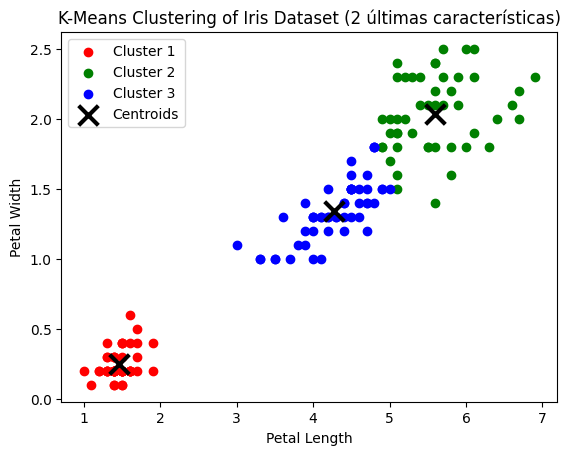

In [ ]:
# Plotar os clusters
colors = ['r', 'g', 'b']  # Cores para os clusters
for i in range(n_clusters):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plotar os centros dos clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering of Iris Dataset (2 últimas características)')
plt.legend()
plt.show()